loss is [6.0957417  0.01190912 6.1076508 ]
loss is [3.3981404e-03 8.1180142e-06 3.4062585e-03]
loss is [1.1300519e-03 1.6663668e-08 1.1300686e-03]
loss is [0.00098661 0.00023583 0.00122244]
loss is [6.3528662e-04 8.1220321e-07 6.3609885e-04]
loss is [4.8790441e-04 1.5878286e-09 4.8790601e-04]
loss is [0.00321974 0.00364473 0.00686447]
loss is [3.1324322e-04 1.1270849e-08 3.1325448e-04]
loss is [2.5001279e-04 7.1053226e-09 2.5001989e-04]
loss is [1.9641322e-04 7.1414803e-09 1.9642037e-04]


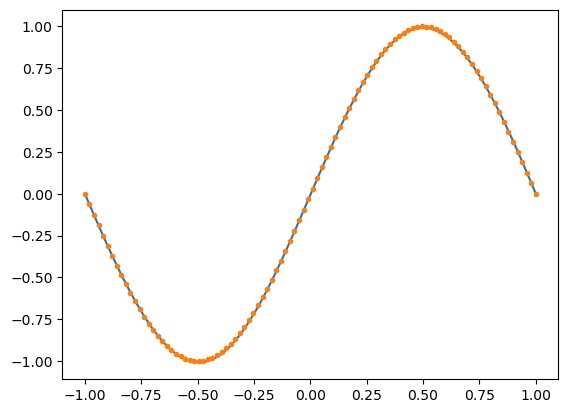

In [3]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib

from user_fun.get_net import ForwardNetwork
from user_fun.solver.cp_solver import CloudPointSolver
from user_fun.baseline import sint

# 保证迭代参数与DEEPXDE一致
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ForwardNetwork([1, 50, 50, 50, 1]).to(device)
loss_fn = torch.nn.MSELoss()

cloud_point_list,loss_list = sint.get_time_problem()
solver = CloudPointSolver(
    cloud_point_list,
    loss_list,
    model = [1, 100, 100, 100, 1],
    optimizer = "adam",
    batchsize = 'all')

epoch_num = 1000
for i in range(epoch_num):
    solver.train_step()
    if i%100 == 0:
        solver.test_step(print_flag=True)

x_cpu = np.linspace(-1,1,100).reshape(100,1)
y_cpu = solver.model_eval(x_cpu)

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(x_cpu,y_cpu)
ax.plot(x_cpu,np.sin(np.pi*x_cpu),'.')

# # 测试batch_size不同的情况
# solver = CloudPointSolver(
#     [[pde_input, pde_output],[bc_input, bc_output]],
#     [pde_loss,data_loss],
#     model = [1, 100, 100, 100, 1],
#     optimizer = "adam",
#     batchsize = 4)

# epoch_num = 1000
# for i in range(epoch_num):
#     solver.train_step()
#     if i%100 == 0:
#         solver.test_step(print_flag=True)

# x_cpu = np.linspace(-1,1,100).reshape(100,1)
# y_cpu = solver.model_eval(x_cpu)

# import matplotlib.pyplot as plt
# fig,ax = plt.subplots()
# ax.plot(x_cpu,y_cpu)
# ax.plot(x_cpu,np.sin(np.pi*x_cpu),'.')